In [32]:
"""
Import and prepare your data for time series modelling.
– (9 points) decompose each signal using the smoothing method that you think appropriate; do the same thing using additive and multiplicative decompositions. Compare
the results.
"""

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Import data
data = pd.read_csv('data.csv', index_col=0)


# remove zero and negative values
data = data[data > 0]
data = data.dropna()

In [33]:
data.head()

,GS10,EXUSUKx,USCONS
time,,,
360,9.322005,0.394032,8.473021
361,9.632165,0.451878,8.640938
362,7.656738,0.367179,8.705040
363,8.812280,0.412580,8.546146
364,10.992067,0.522288,8.667838


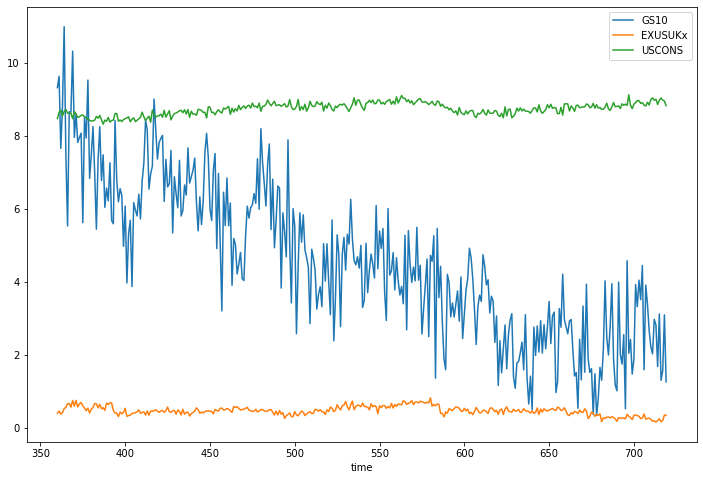

In [34]:


# Plot data
data.plot(figsize=(12, 8))
plt.show()



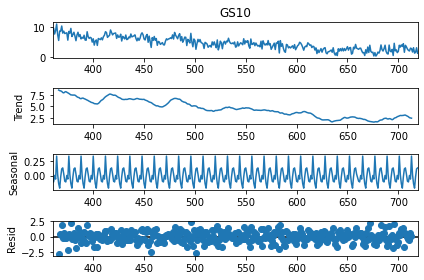

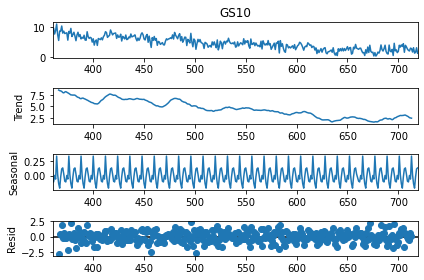

In [35]:
# Decompose data
from statsmodels.tsa.seasonal import seasonal_decompose

series = data['GS10']
result = seasonal_decompose(series, model='additive', freq=12)
result.plot()


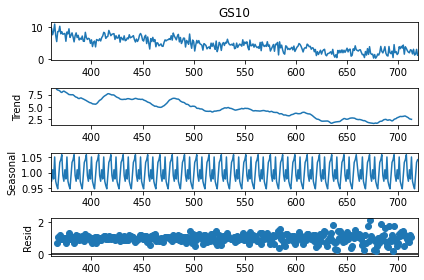

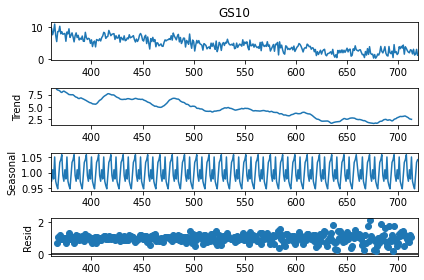

In [36]:

series = data['GS10']
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()


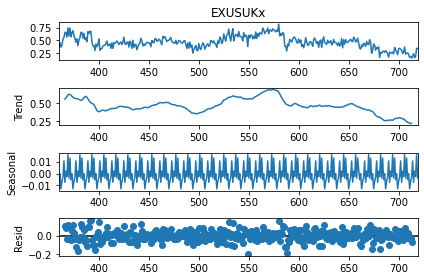

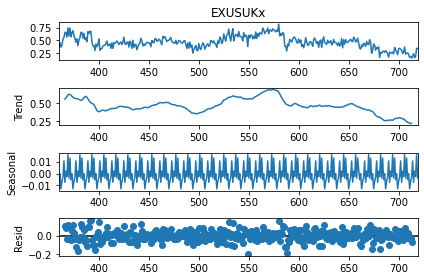

In [37]:
series = data['EXUSUKx']
result = seasonal_decompose(series, model='additive', freq=12)
result.plot()

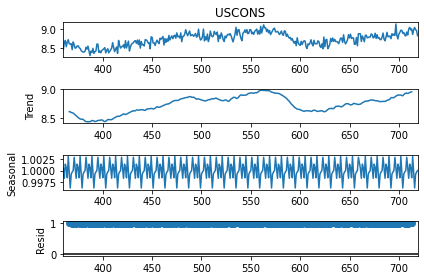

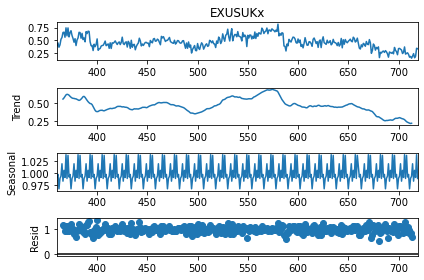

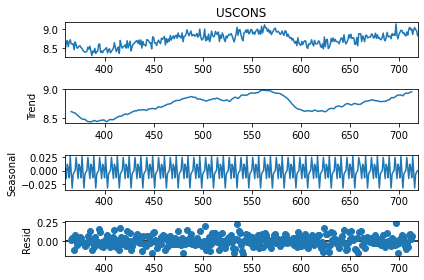

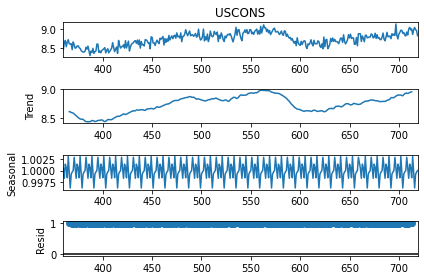

In [38]:
series = data['EXUSUKx']
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()

# %%
series = data['USCONS']
result = seasonal_decompose(series, model='additive', freq=12)
result.plot()

# %%
series = data['USCONS']
result = seasonal_decompose(series, model='multiplicative', freq=12)
result.plot()

In [39]:
# Detrend data
from scipy import signal

seriesGS10 = data['GS10']
seriesEXUSUKx = data['EXUSUKx']
seriesUSCONS = data['USCONS']

detrendGS10 = signal.detrend(seriesGS10)
detrendEXUSUKx = signal.detrend(seriesEXUSUKx)
detrendUSCONS = signal.detrend(seriesUSCONS)

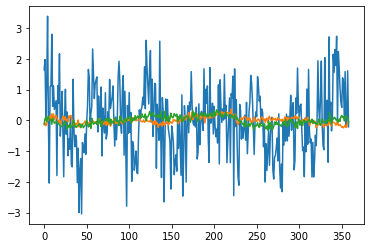

In [40]:
# Plot detrended data
plt.plot(detrendGS10)
plt.plot(detrendEXUSUKx)
plt.plot(detrendUSCONS)
plt.show()


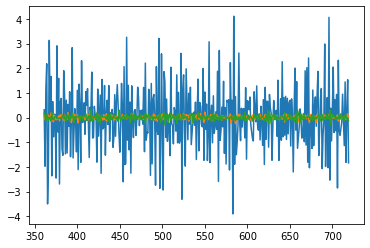

In [41]:
# Differencing data
diffGS10 = seriesGS10.diff()
diffEXUSUKx = seriesEXUSUKx.diff()
diffUSCONS = seriesUSCONS.diff()

# %%
# Plot differenced data in one plot
plt.plot(diffGS10)
plt.plot(diffEXUSUKx)
plt.plot(diffUSCONS)
plt.show()

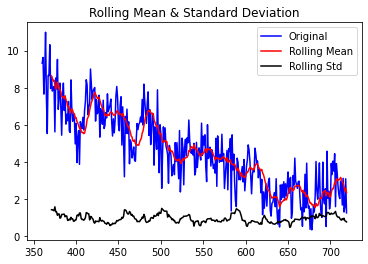

Results of Dickey-Fuller Test:
Test Statistic                  -1.765807
p-value                          0.397565
#Lags Used                       8.000000
Number of Observations Used    350.000000
Critical Value (1%)             -3.449173
Critical Value (5%)             -2.869833
Critical Value (10%)            -2.571188
dtype: float64


In [42]:

# Check for stationarity, unit root
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# %%
# Check for stationarity, unit root
test_stationarity(seriesGS10)

In [43]:
# Split data into training and test sets

train_data = data[:350]

# remainder of data
test_data = data[350:]

In [44]:

# Model each series with a SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# %%
model = SARIMAX(train_data['GS10'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               GS10   No. Observations:                  350
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -514.318
Date:                            Mon, 24 Oct 2022   AIC                           1038.635
Time:                                    08:04:03   BIC                           1057.736
Sample:                                         0   HQIC                          1046.249
                                            - 350                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0556      0.072     -0.767      0.443      -0.198       0.086
ma.L1         -0.7513      0.052    -14.542      0.000      -0.853      -0.650
ar.S.L12       0.0103      0.064      0.161      0.872      -0.115       0.136
ma.S.L12      -0.9976      1.041     -0.958      0.338      -3.039       1.043
sigma2         1.0987      1.112      0.988      0.323      -1.081       3.278
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.21
Prob(Q):                              0.91   Prob(JB):                         0.90
Heteroskedasticity (H):               0.87   Skew:                            -0.00
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

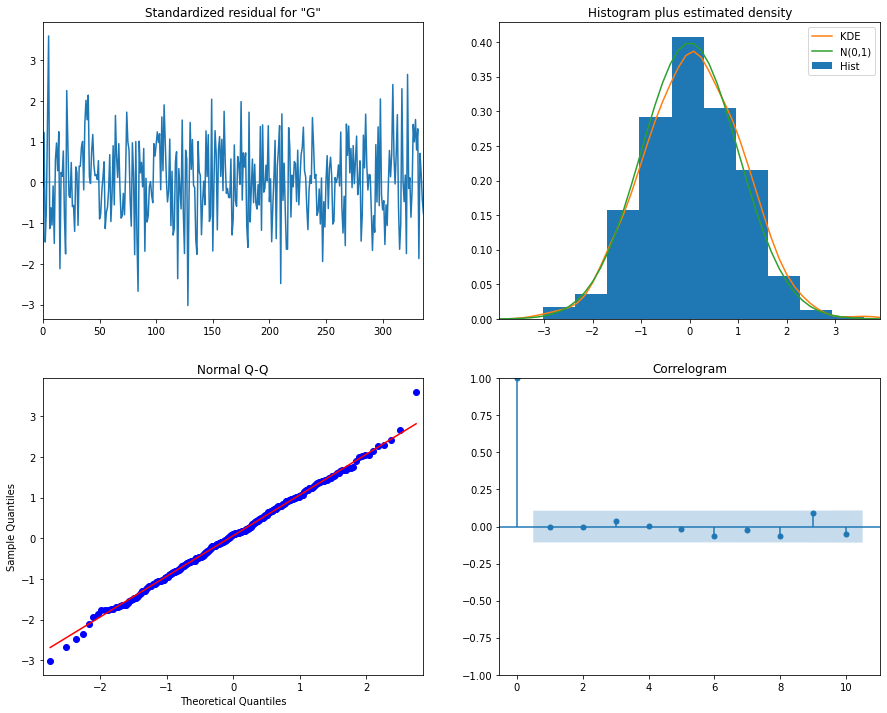

In [45]:
# Plot actual and predicted values
results.plot_diagnostics(figsize=(15,12))
plt.show()